# SAx
**Signal Axis**: For any modusa signal, we have a dedicated class to represent their axes.

How to create a new **SAx** instance? \
There are various ways to create an axis,
1. Directly invoke the constructor
2. Use provided APIs to create different types of axis

In [1]:
import modusa as ms
import numpy as np

## Object Instantiation

### With Constructor

In [2]:
uniform_sax = ms.sax(values=np.arange(10), label="My Uniform Axis (unit)")
print(uniform_sax)
uniform_sax.print_info()

SAx([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], shape=(10,), label=My Uniform Axis (unit))
--------------------------------------------------
Axis Info
--------------------------------------------------
Label               : My Uniform Axis (unit)
Shape               : (10,)
Start Value         : 0.00
End Value           : 9.00
Inheritance         : ABC → ModusaSignal → SAx


In [3]:
non_uniform_axis = ms.sax(values=[1, 2, 4, 5, 7, 8], label="My Non-Uniform Axis (unit)")
print(non_uniform_axis)
non_uniform_axis.print_info()

SAx([1, 2, 4, 5, 7, 8], shape=(6,), label=My Non-Uniform Axis (unit))
--------------------------------------------------
Axis Info
--------------------------------------------------
Label               : My Non-Uniform Axis (unit)
Shape               : (6,)
Start Value         : 1.00
End Value           : 8.00
Inheritance         : ABC → ModusaSignal → SAx


### With built-in APIs

In [4]:
time_sax = ms.sax.linear(n_points=100, sr=2, start=10, label="Time (sec)")
print(time_sax)
time_sax.print_info()

SAx([10. , 10.5, 11. , ..., 58.5, 59. , 59.5], shape=(100,), label=Time (sec))
--------------------------------------------------
Axis Info
--------------------------------------------------
Label               : Time (sec)
Shape               : (100,)
Start Value         : 10.00
End Value           : 59.50
Inheritance         : ABC → ModusaSignal → SAx


## Visualisation
We have a dedicated `.plot` method for this.

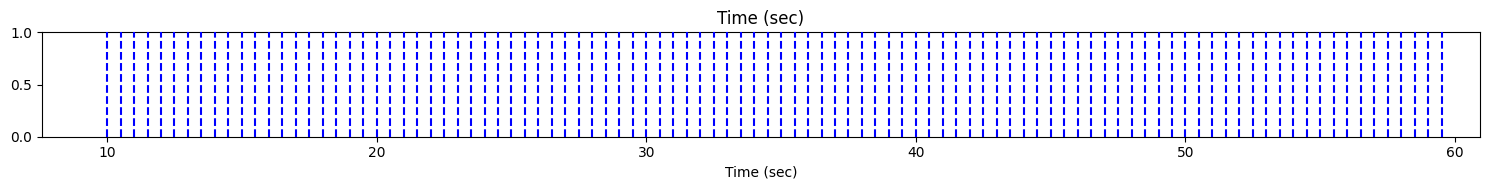

In [5]:
time_sax.plot()

## Math Operations
Since we are dealing with an axis, we provide comparison operations APIs.

### Comparison
All the comparison operations returns a `Signal1D` instance storing boolean values at the right spot.

In [6]:
time_sax = ms.sax.linear(n_points=100, sr=100, start=0.0, label="Time (sec)")
time_sax > 0.5

Data: Signal1D([False, False, ...,  True,  True], shape=(100,), label=Mask)
-----
Axis: (SAx([0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99], shape=(100,), label=Time (sec)),)

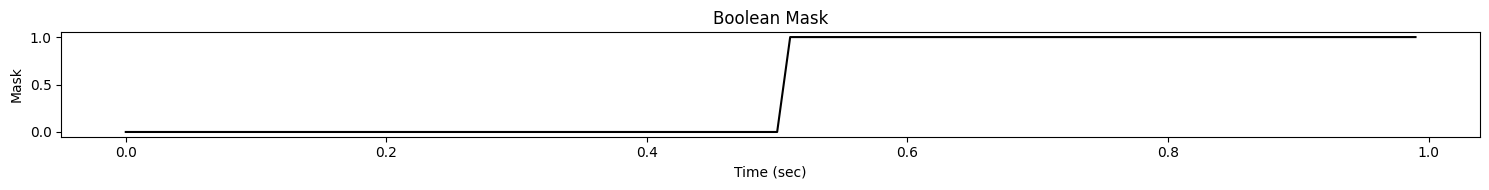

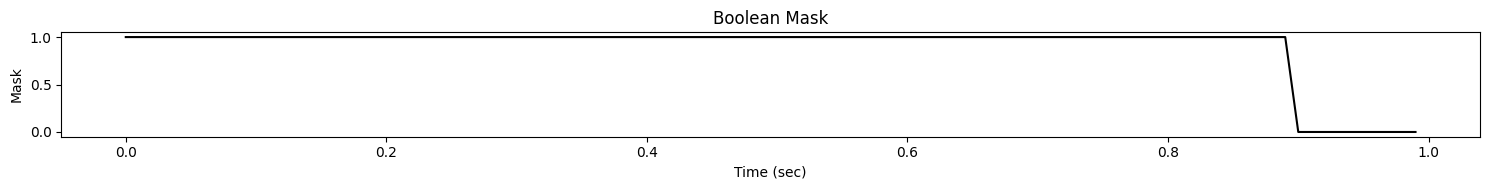

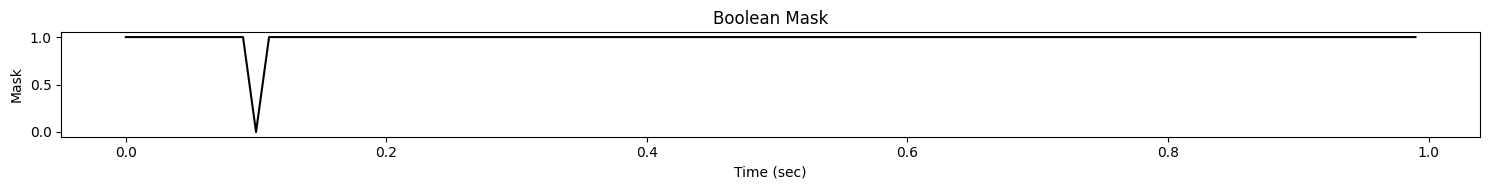

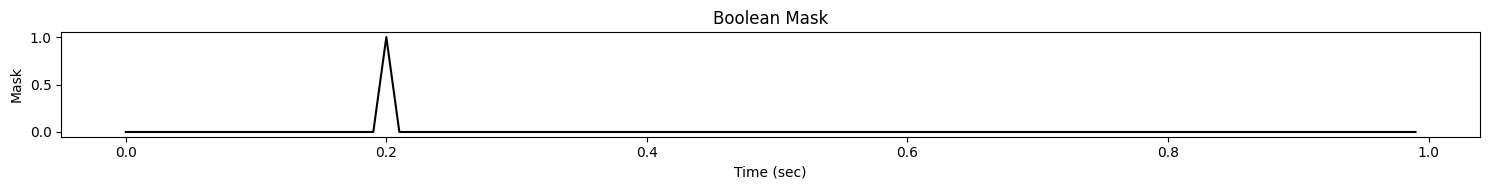

In [7]:
display((time_sax > 0.5).plot())
display((time_sax < 0.9).plot())
display((time_sax != 0.1).plot())
display((time_sax == 0.2).plot())

## Indexing
You can use indexing on `SAx` instance. This returns a new instance of `SAx`.

In [8]:
print(time_sax[0:10])
print(time_sax[::3])

SAx([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09], shape=(10,), label=Time (sec))
SAx([0.  , 0.03, 0.06, ..., 0.93, 0.96, 0.99], shape=(34,), label=Time (sec))


## Setting Meta Info
You can use `.set_meta_info` API to set label. Although, this API is provided but it is **recommended** that while creating a custom axis, you assign the label.

In [9]:
time_sax.set_meta_info(label="Time (min)")

SAx([0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99], shape=(100,), label=Time (min))

In [10]:
time_sax[time_sax > 0.4]

SAx([0.41, 0.42, 0.43, ..., 0.97, 0.98, 0.99], shape=(59,), label=Time (sec))